<a href="https://colab.research.google.com/github/yeamuhid/mashing-learning/blob/main/Semi_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import accuracy_score

# Load a dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Create a subset of labeled and unlabeled data
# Setting some labels to -1 to indicate unlabeled data
rng = np.random.RandomState(42)
y_unlabeled = np.copy(y)
n_unlabeled_points = int(0.7 * len(y))  # 70% unlabeled
unlabeled_indices = rng.choice(len(y), n_unlabeled_points, replace=False)
y_unlabeled[unlabeled_indices] = -1  # Marking them as unlabeled

# Train-test split (labeled data is used for validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Label Spreading
label_spreading = LabelSpreading(kernel='knn', n_neighbors=5)
label_spreading.fit(X, y_unlabeled)

# Predict on test data
y_pred = label_spreading.predict(X_test)

# Evaluate
print("Accuracy on test set:", accuracy_score(y_test, y_pred))

# Visualize some results (optional)
for i, label in enumerate(y_pred[:10]):  # Show first 10 predictions
    print(f"Sample {i}: Predicted={label}, Actual={y_test[i]}")



Accuracy on test set: 1.0
Sample 0: Predicted=1, Actual=1
Sample 1: Predicted=0, Actual=0
Sample 2: Predicted=2, Actual=2
Sample 3: Predicted=1, Actual=1
Sample 4: Predicted=1, Actual=1
Sample 5: Predicted=0, Actual=0
Sample 6: Predicted=1, Actual=1
Sample 7: Predicted=2, Actual=2
Sample 8: Predicted=1, Actual=1
Sample 9: Predicted=1, Actual=1


In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.semi_supervised import LabelPropagation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic dataset
X, y = make_classification(
    n_samples=500, n_features=2, n_classes=2, n_clusters_per_class=1, random_state=42
)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("Original Labeled Data")
plt.show()

# Step 2: Create labeled and unlabeled data
# Mark 80% of the labels as -1 (unlabeled)
rng = np.random.RandomState(42)
y_unlabeled = np.copy(y)
n_unlabeled_points = int(0.8 * len(y))  # 80% unlabeled
unlabeled_indices = rng.choice(len(y), n_unlabeled_points, replace=False)
y_unlabeled[unlabeled_indices] = -1  # Mark these as unlabeled

# Visualize the data with unlabeled points
plt.scatter(X[:, 0], X[:, 1], c=y_unlabeled, cmap='coolwarm', edgecolor='k')
plt.title("Partially Labeled Data")
plt.show()

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Apply Label Propagation
label_propagation = LabelPropagation(kernel='knn', n_neighbors=5)
label_propagation.fit(X, y_unlabeled)

# Step 5: Predict on test data
y_pred = label_propagation.predict(X_test)

# Step 6: Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))

# Visualize predicted labels on the entire dataset
y_full_pred = label_propagation.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_full_pred, cmap='coolwarm', edgecolor='k')
plt.title("Labels Predicted by Label Propagation")
plt.show()


ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

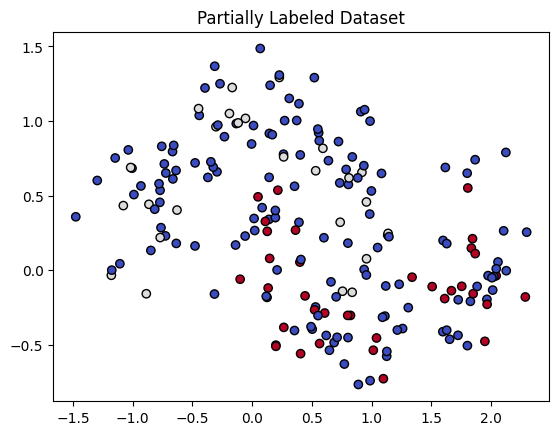

Accuracy on Full Dataset: 0.965


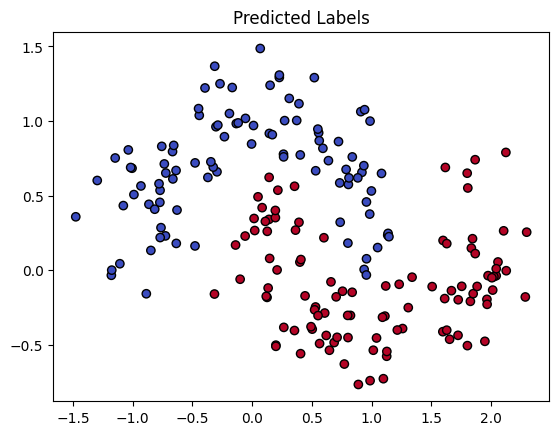

In [3]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Step 2: Create partially labeled data
# Mark 70% of the labels as -1 (unlabeled)
rng = np.random.RandomState(42)
y_semi = np.copy(y)
n_unlabeled_points = int(0.7 * len(y))
unlabeled_indices = rng.choice(len(y), n_unlabeled_points, replace=False)
y_semi[unlabeled_indices] = -1  # Assign -1 to indicate unlabeled data

# Step 3: Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y_semi, cmap='coolwarm', edgecolor='k')
plt.title("Partially Labeled Dataset")
plt.show()

# Step 4: Train the Label Propagation model
model = LabelPropagation(kernel='rbf', gamma=20)  # RBF kernel with a specific gamma
model.fit(X, y_semi)

# Step 5: Predict the labels
y_pred = model.predict(X)

# Step 6: Evaluate the model
accuracy = accuracy_score(y, y_pred)
print("Accuracy on Full Dataset:", accuracy)

# Step 7: Visualize the predicted labels
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k')
plt.title("Predicted Labels")
plt.show()


In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Step 2: Simulate unlabeled data
rng = np.random.RandomState(42)
y_unlabeled = np.copy(y)

# Randomly select 50% of the data to be unlabeled (set labels to -1)
n_unlabeled_points = int(0.5 * len(y))  # 50% unlabeled data
unlabeled_indices = rng.choice(len(y), n_unlabeled_points, replace=False)
y_unlabeled[unlabeled_indices] = -1  # Mark as unlabeled (-1)

# Step 3: Train-Test Split (using labeled data for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Apply Label Spreading algorithm
label_spreading = LabelSpreading(kernel='rbf', alpha=0.8)
label_spreading.fit(X, y_unlabeled)

# Step 5: Predict on test set
y_pred = label_spreading.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

# Optional: Display some sample predictions
print("\nSample Predictions (first 10 samples):")
for i in range(10):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")


Accuracy on Test Set: 1.0

Sample Predictions (first 10 samples):
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:322: ConvergenceWarning: max_iter=30 was reached without convergence.
  warnings.warn(


In [5]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset (Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Step 2: Simulate unlabeled data
# Randomly set 50% of the labels to -1 (indicating unlabeled)
rng = np.random.RandomState(42)
y_unlabeled = np.copy(y)
n_unlabeled = int(0.5 * len(y))  # 50% unlabeled
unlabeled_indices = rng.choice(len(y), n_unlabeled, replace=False)
y_unlabeled[unlabeled_indices] = -1  # Mark these as unlabeled (-1)

# Step 3: Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Apply the LabelSpreading model
label_spreading = LabelSpreading(kernel='knn', n_neighbors=5)
label_spreading.fit(X, y_unlabeled)  # Train the model with both labeled and unlabeled data

# Step 5: Predict the labels for the test set
y_pred = label_spreading.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy * 100:.2f}%")

# Step 7: Show some sample predictions
print("\nSample Predictions:")
for i in range(5):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")


Accuracy on Test Set: 100.00%

Sample Predictions:
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1


In [6]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Create a synthetic dataset
X, y = make_classification(
    n_samples=500, n_features=2, n_classes=2, n_clusters_per_class=1, random_state=42
)

# Visualize the original dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("Original Labeled Data")
plt.show()

# Step 2: Create labeled and unlabeled data
rng = np.random.RandomState(42)
y_semi = np.copy(y)
n_unlabeled_points = int(0.8 * len(y))  # 80% of data as unlabeled
unlabeled_indices = rng.choice(len(y), n_unlabeled_points, replace=False)
y_semi[unlabeled_indices] = -1  # Mark unlabeled points as -1

# Visualize the dataset with unlabeled points
plt.scatter(X[:, 0], X[:, 1], c=y_semi, cmap='coolwarm', edgecolor='k')
plt.title("Partially Labeled Data")
plt.show()

# Step 3: Apply Label Spreading for Semi-Supervised Learning
model = LabelSpreading(kernel='knn', n_neighbors=5)
model.fit(X, y_semi)

# Step 4: Predict the labels
y_full_pred = model.predict(X)

# Visualize predicted labels
plt.scatter(X[:, 0], X[:, 1], c=y_full_pred, cmap='coolwarm', edgecolor='k')
plt.title("Predicted Labels with Label Spreading")
plt.show()

# Step 5: Evaluate the model
# Since we know the true labels, compare them
accuracy = accuracy_score(y, y_full_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y, y_full_pred))


ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

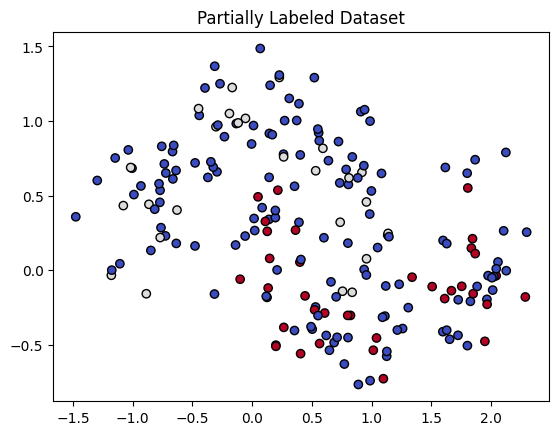

Accuracy on Full Dataset: 0.965


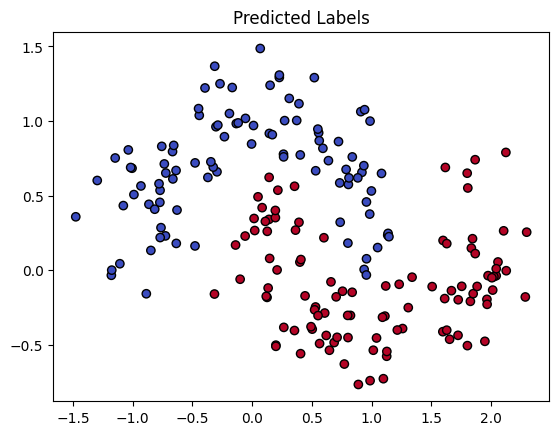

In [7]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Step 2: Create partially labeled data
# Mark 70% of the labels as -1 (unlabeled)
rng = np.random.RandomState(42)
y_semi = np.copy(y)
n_unlabeled_points = int(0.7 * len(y))
unlabeled_indices = rng.choice(len(y), n_unlabeled_points, replace=False)
y_semi[unlabeled_indices] = -1  # Assign -1 to indicate unlabeled data

# Step 3: Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y_semi, cmap='coolwarm', edgecolor='k')
plt.title("Partially Labeled Dataset")
plt.show()

# Step 4: Train the Label Propagation model
model = LabelPropagation(kernel='rbf', gamma=20)  # RBF kernel with a specific gamma
model.fit(X, y_semi)

# Step 5: Predict the labels
y_pred = model.predict(X)

# Step 6: Evaluate the model
accuracy = accuracy_score(y, y_pred)
print("Accuracy on Full Dataset:", accuracy)

# Step 7: Visualize the predicted labels
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k')
plt.title("Predicted Labels")
plt.show()
